# 군집화(Clustering)
- 비지도학습으로 정답없이 특징만 가지고, 보유한 데이터로 모델을 구현

In [30]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [31]:
import pandas as pd
df = pd.read_csv('../Data/student_kmeans.csv')
df.head()

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


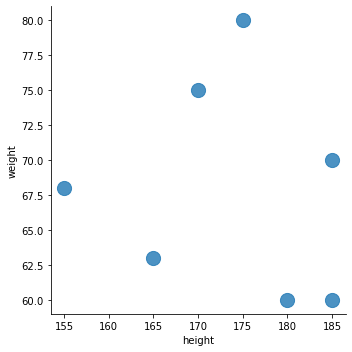

In [32]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(
    'height',
    'weight',
    data=df,
    fit_reg=False,
    scatter_kws={"s":200}
)
plt.show()

### k-Means 군집화

In [33]:
df.values

array([[185,  60],
       [180,  60],
       [185,  70],
       [165,  63],
       [155,  68],
       [170,  75],
       [175,  80]])

In [34]:
from sklearn.cluster import KMeans
data_points = df.values
kmeans = KMeans(
    n_clusters=3
).fit(data_points)

In [35]:
# 각 군집의 중심위치
kmeans.cluster_centers_

array([[183.33333333,  63.33333333],
       [172.5       ,  77.5       ],
       [160.        ,  65.5       ]])

In [36]:
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,0
1,180,60,0
2,185,70,0
3,165,63,2
4,155,68,2
5,170,75,1
6,175,80,1


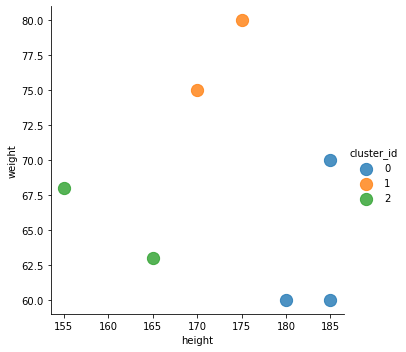

In [37]:
# 시각화
sns.lmplot(
    'height',
    'weight',
    data=df,
    fit_reg=False,
    scatter_kws={'s':150},
    hue='cluster_id'
)

---
### iris 군집화 비교

In [38]:
iris = pd.read_csv("../Data/iris.csv")
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
# Name을 숫자로 변형하기
iris['label'] = iris['Name'].map({'Iris-setosa':0,"Iris-versicolor":1,"Iris-virginica":2})

In [40]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


### k-Means 군집화

In [41]:
iris2 = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]

In [42]:
data_points = iris2.values
kmeans = KMeans(n_clusters=3).fit(data_points)

In [43]:
# 중심점 확인
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [44]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [45]:
iris['cluster_id'] = kmeans.labels_
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1


# 시각화 해보기
cluster id의 일련번호가 틀리게 나올수 있으므로 시각화를 통한 확인이 필요

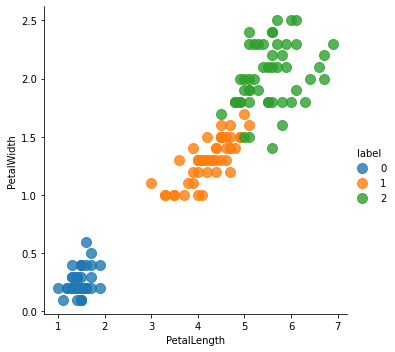

In [47]:
# 시각화
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={'s':100},
    hue='label'
)
plt.show()

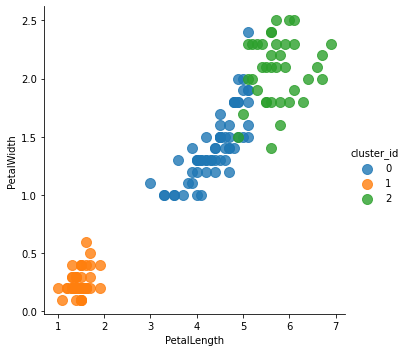

In [56]:
# 시각화
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={'s':100},
    hue='cluster_id'
)
plt.show()

In [49]:
# cluster_id : 0 -> 1, 1 -> 0 , 2 -> 2
# Name을 숫자로 변형하기
iris['cluster_id2'] = iris['cluster_id'].map({0:1,1:0,2:2})

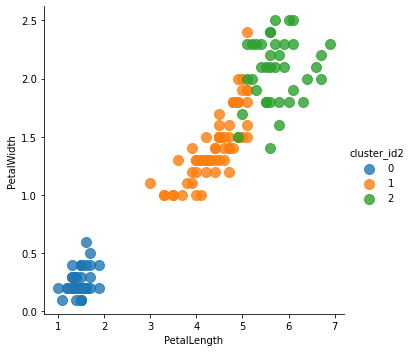

In [55]:
# 시각화
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={'s':100},
    hue='cluster_id2'
)
plt.show()

In [50]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id,cluster_id2
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2,0,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2,0,1


In [51]:
sum(iris['label']== iris['cluster_id2']) / len(iris)

0.8933333333333333

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.label, iris.cluster_id2)

0.8933333333333333